In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
churn = pd.read_csv('churn.csv')

In [8]:
#将类别变量转化为数字型变量
churn = pd.get_dummies(churn)
churn.columns = churn.columns.str.lower()
churn.drop(['churn_no','gender_male'],axis=1,inplace=True)
churn = churn.rename(columns = {'churn_yes':'flag'})

In [9]:
churn.head()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,flag,gender_female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1


In [10]:
#查看flag比例
churn.flag.value_counts(1)

0    0.73463
1    0.26537
Name: flag, dtype: float64

In [11]:
summary = churn.groupby('flag')
summary.mean()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,gender_female
flag,,,,,,,,,,,,,,,
0,0.528218,0.344801,0.901044,0.379204,0.347700,0.365868,0.369927,0.429068,0.252609,0.248550,0.249324,0.250097,61.265124,2545.918081,0.492656
1,0.357945,0.174425,0.909042,0.245586,0.693954,0.435527,0.437667,0.885500,0.088818,0.138042,0.124131,0.573034,74.441332,1528.514714,0.502408


<AxesSubplot:xlabel='count', ylabel='contract_month'>

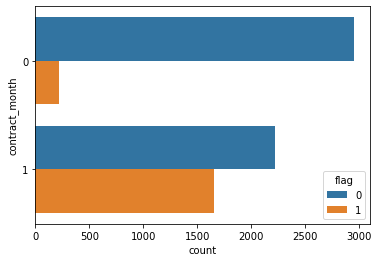

In [12]:
#contract_month与客户流失的关系
sns.countplot(y='contract_month',hue='flag',data=churn)

In [13]:
#相关性
churn.corr()[['flag']].sort_values('flag',ascending=False)

,flag
flag,1.000000
contract_month,0.405103
internet_other,0.308020
paymentelectronic,0.301919
monthlycharges,0.193356
streamingtv,0.063228
streamingmovies,0.061382
landline,0.011942
gender_female,0.008612
paymentbank,-0.117937


<AxesSubplot:>

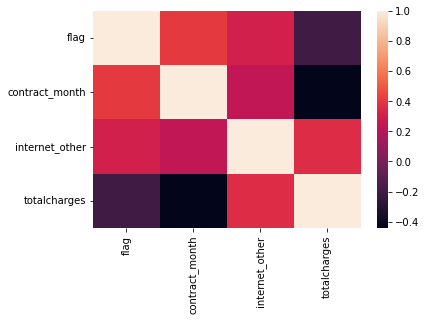

In [14]:
#使用热力图呈现变量间相关性
q1=['flag','contract_month','internet_other','totalcharges']
sns.heatmap(churn[q1].corr())

In [18]:
#模型建立
#建模并拟合模型
from sklearn import linear_model
lr=linear_model.LogisticRegression()#使用逻辑回归模块

In [19]:
#设定x和y变量
y=churn['flag']
x=churn[['contract_month','internet_other','streamingtv']]

In [20]:
# 切分训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [21]:
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
# 查看模型截距
lr.intercept_

array([-3.25029156])

In [26]:
# 查看模型系数
lr.coef_

array([[2.2229613 , 1.15089043, 0.24559832]])

In [27]:
#模型评估
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
print(y_pred_train)

[0 1 0 ... 0 1 1]


In [28]:
#搭建训练集混淆矩阵
import sklearn.metrics as metrics
metrics.confusion_matrix(y_train,y_pred_train)

array([[2975,  652],
       [ 483,  820]])

In [29]:
#计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.7697768762677485

In [30]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[1233,  314],
       [ 224,  342]])

In [31]:
#计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.7453857075248462

In [32]:
#模型优化 调整参数 test_size:0.3->0.5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)

In [33]:
#建模
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
print(y_pred_train)

[0 1 0 ... 0 1 1]


In [35]:
#优化模型评估 计算准确率
#搭建训练集混淆矩阵
import sklearn.metrics as metrics
metrics.confusion_matrix(y_train,y_pred_train)

array([[2128,  466],
       [ 347,  580]])

In [36]:
#计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.7690996875887532

In [37]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[2080,  500],
       [ 360,  582]])

In [38]:
#计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.7558205565019875

原模型:
训练集准确率 0.770
测试集准确率 0.745
参数调整后:
训练集准确率 0.769
测试集准确率 0.756 ↑

此时测试集准确率上升，训练集不变，说明样本量不够

In [39]:
#模型优化 调整变量
#调整变量
y=churn['flag']
x=churn[['contract_month','internet_other','paymentelectronic']]

In [40]:
# 加载数据切分工具包
from sklearn.model_selection import train_test_split
# 切分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)

In [41]:
#建模
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
print(y_pred_train)

[0 1 0 ... 0 1 1]


In [43]:
#优化模型评估 计算准确率
#搭建训练集混淆矩阵
import sklearn.metrics as metrics
metrics.confusion_matrix(y_train,y_pred_train)

array([[2340,  254],
       [ 528,  399]])

In [44]:
#计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.7779040045441636

In [45]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[2316,  264],
       [ 552,  390]])

In [46]:
#计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.768313458262351

原模型:
训练集准确率 0.770
测试集准确率 0.745

参数调整后:
训练集准确率 0.769
测试集准确率 0.756 ↑

调整变量后:
训练集准确率  0.778↑
测试集准确率  0.768↑

In [47]:
# 查看模型截距
lr.intercept_

array([-3.22833942])

In [48]:
# 查看模型系数
# 'contract_month','internet_other','paymentelectronic'
lr.coef_

array([[2.03292538, 1.04095427, 0.62567014]])